> NOTE: all challenges in this assignment are adapted from material created by Prof. Ram Yamarthy (2021).

# Instructions

1. **Make a copy of this notebook** so you can edit and save your own version of it. Optionally update the notebook title to include your Group Number and/or the Net IDs of all group members. Do the work in your copy of the notebook. 

2. Edit the sharing settings: **share your notebook** publicly, so **"Anyone with the link can view"**. Notebooks not shared properly may be subject to late deductions if an instructor is unable to access them at the time of grading.

3. **Run the Setup Cells** in the "Setup" section.

4. **Complete the challenges**. For each challenge:
    + **Run any additional provided "Setup" cell(s)**, as necessary.
    + **Write Python code** to answer each of the provided questions. 






# Submission Instructions



To review your notebook / ensure it works as expected / prepare for evaluation: 
  1. Run it from scratch ("Runtime" > "Restart and run all"), provide any necessary user inputs, and verify you see the results you expect.


When you're done coding and your notebook reflects your final work product, follow BOTH these steps to submit:

  1. Download a copy of your notebook document in .ipynb format ("File" > "Download" > "Download .ipynb"). Then **upload the resulting .ipynb notebook file to Canvas**.
  2. Ensure your notebook sharing settings are open so "anyone with the link can view", then **submit your Colab Notebook URL via the [Submission Form](https://forms.gle/gWHLVjN2XVmqCogm7)**. 


> NOTE: only one member needs to submit on behalf of the group.

Thank you!

# Evaluation

Deliverables will be evaluated based on the criteria below:

Category | Weight | Description
--- | --- | ---
Challenge 1 | 50% | 
Challenge 2 | 40% | 
Chart Quality and Formatting | 10% | All charts should have a title, and axis labels. 

This rubric is tentative, and may be subject to adjustments during the grading process.

# Setup

## Imports

In [22]:

# RUN THIS CELL AND FEEL FREE TO MODIFY / UPDATE AS DESIRED

import numpy as np
import pandas as pd
from pandas.tseries.offsets import MonthEnd, YearEnd

import plotly.express as px
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima.model import ARIMA

## Ignore Warnings

In [23]:
# https://stackoverflow.com/a/9031848/670433
import warnings

warnings.filterwarnings('ignore')

## Correlation Example

In [24]:
# feel free to reference this example  
# ... and adapt / replicate the correlation calculations 
# ... when you get to Challenge 2 Question B

# this is just an example dataframe, 
# where column a and b are closely correlated,
# and also including a NaN val in each column (to help us practice computing correlation even with null values)
example_df = pd.DataFrame({
    "col_a": [1,2,3,4,5,6, None],
    "col_b": [101,198,305,402,497,595, None],
    "col_c": [9, 4, 2, 100, 88, 44, None]
})
example_df

,col_a,col_b,col_c
0,1.0,101.0,9.0
1,2.0,198.0,4.0
2,3.0,305.0,2.0
3,4.0,402.0,100.0
4,5.0,497.0,88.0
5,6.0,595.0,44.0
6,NaN,NaN,NaN


In [25]:
# option a) pair-wise correlation matrix using DataFrame corr() method

example_df.corr()

,col_a,col_b,col_c
col_a,1.000000,0.999858,0.640007
col_b,0.999858,1.000000,0.641870
col_c,0.640007,0.641870,1.000000


In [26]:
# option b) use scipy 
# ... either the spearman or the pearson methodology would be fine for this assignment
# ... https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
# ... https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

from scipy.stats import spearmanr, pearsonr

print("---------------------")
print("SPEARMAN CORRELATION...")
corr_results = spearmanr(example_df["col_a"], example_df["col_b"], nan_policy="omit")
print(corr_results)

print("---------------------")
print("PEARSON CORRELATION...") 
example_df.dropna(inplace=True) # for pearson we need to drop NaNs beforehand
corr_results = pearsonr(example_df["col_a"], example_df["col_b"])
print(corr_results) #> (correlation, pvalue)

---------------------
SPEARMAN CORRELATION...
SpearmanrResult(correlation=1.0, pvalue=0.0)
---------------------
PEARSON CORRELATION...
(0.999857633165385, 3.0401030629471845e-08)


# Challenges

> NOTE: all challenges adapted from material created by Prof. Ram Yamarthy (2021).

## 1) Consumer Spending Over Time 



Here we examine trends that exist in real, quarterly U.S. consumer spending. We'll work with the dataset called "ConsumerSpending.xlsx" which comes from the U.S. Bureau of Economic Analysis.

(a) Load the data. What columns do you see in the dataset? If necessary, convert the `"Date"` column to a pandas datetime object, using `pd.to datetime()`. Then also add a column called `"Quarter"` indicating which quarter the data pertains to. 

> HINT: for a dataframe called `df` with a `"Date"` column that is a pandas datetime object, try `df["Date"].dt.quarter`



(b) Plot the time series of total retail sales, with `"Date"` on the x-axis and `"RealPCE"` on the y-axis. What do you see? From a basic visual inspection, is there a clear trend and / or seasonality?

(c) Given the evidence for a trend, estimate a linear regression using the `statsmodels` package. Display the regression results (i.e. use the summary function).

(d) Plot the true `"RealPCE"` values against the fitted / predicted values from the regression. 

(e) Also plot the residuals obtained from the regression results. 

(f) Using the residuals obtained from the regression results, show evidence that there are quarterly, seasonal effects.

> HINT: use the `groupby()` method

(g) Show evidence that consumer spending has become more seasonal after 1990, relative to the pre-1990 period. One way to do this is to compute quarterly effects in the pre- and post- 1990 periods, and compare their relative volatilities across quarters.

> HINT: use row filtering approaches to arrive at two different subsets of the data, and perform the analysis on each subset

**OPTIONAL FURTHER EXPLORATION:**

(h) Optionally repeat parts (d) through (g), but this time using values predicted by a non-parametric trend line smoothing function such as the `lowess`.



### A) LOAD AND CLEAN DATA

In [27]:
# LOAD THE DATA

file_name = "ConsumerSpending.xlsx"
spending_df = pd.read_excel(f"https://github.com/s2t2/msfo-833-prep/blob/main/data/{file_name}?raw=true")
spending_df.head()

,Date,NominalPCE,PCEDeflator,RealPCE
0,1947-03-31,36748,12.225,300597.137014
1,1947-06-30,39831,12.322,323251.095601
2,1947-09-30,39991,12.552,318602.613129
3,1947-12-31,45282,12.865,351978.235523
4,1948-03-31,40579,13.007,311978.165603


### B) VISUALIZATION OF TRENDS

In [28]:
px.scatter(spending_df, x="Date", y="RealPCE", 
              trendline="ols", trendline_color_override="red",
              title="Consumer Spending w/ Trend Line (OLS)"
)

In [29]:
px.scatter(spending_df, x="Date", y="RealPCE", 
        trendline="lowess", trendline_color_override="red",
        title="Consumer Spending w/ Trend Line (Lowess)"
)

### C) LINEAR REGRESSION (OLS)

In [30]:
print(spending_df.columns)

Index(['Date', 'NominalPCE', 'PCEDeflator', 'RealPCE'], dtype='object')


In [31]:
print(spending_df.head())

        Date  NominalPCE  PCEDeflator        RealPCE
0 1947-03-31       36748       12.225  300597.137014
1 1947-06-30       39831       12.322  323251.095601
2 1947-09-30       39991       12.552  318602.613129
3 1947-12-31       45282       12.865  351978.235523
4 1948-03-31       40579       13.007  311978.165603


In [32]:
# specify the dependent and independent variables
X = spending_df[["PCEDeflator"]]
y = spending_df["NominalPCE"]

# add a constant to the independent variable for the intercept term
X = sm.add_constant(X)

# fit the model
model = sm.OLS(y, X).fit()

# display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             NominalPCE   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     3786.
Date:                Fri, 20 Jan 2023   Prob (F-statistic):          4.53e-171
Time:                        20:55:44   Log-Likelihood:                -4200.1
No. Observations:                 299   AIC:                             8404.
Df Residuals:                     297   BIC:                             8412.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.216e+05   3.29e+04    -18.871      

### D) PLOT PREDICTIONS





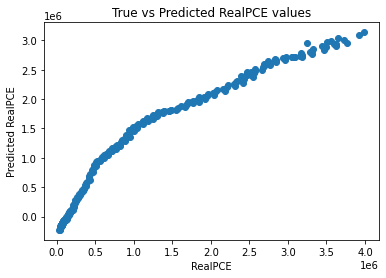

In [33]:
# predict the values using the model
y_pred = model.predict(X)

# create the scatter plot
plt.scatter(y, y_pred)
plt.xlabel("RealPCE")
plt.ylabel("Predicted RealPCE")
plt.title("True vs Predicted RealPCE values")
plt.show()

### E) PLOT RESIDUALS





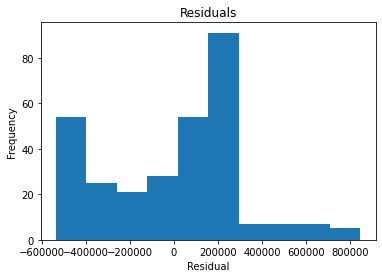

In [34]:
# predict the values using the model
y_pred = model.predict(X)

# calculate the residuals
residuals = y - y_pred

# create the histogram of residuals
plt.hist(residuals)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residuals")
plt.show()

### F) SEASONALITY

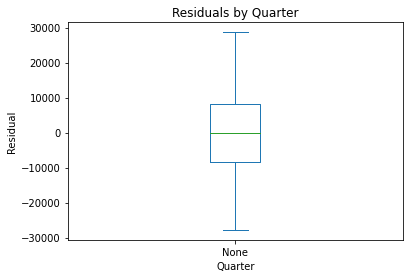

In [35]:
# Create a quarter column
spending_df['Quarter'] = spending_df['Date'].dt.quarter

# Group the residuals by quarter
residuals_by_quarter = residuals.groupby(spending_df['Quarter']).mean()

# Create a box plot of the residuals for each quarter
residuals_by_quarter.plot(kind='box')
plt.xlabel("Quarter")
plt.ylabel("Residual")
plt.title("Residuals by Quarter")
plt.show()


### G) INCREASE IN SEASONALITY

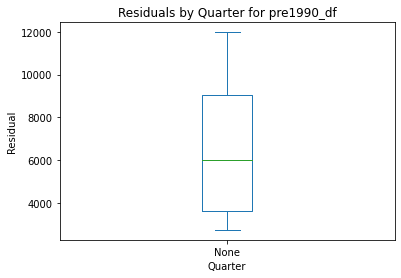

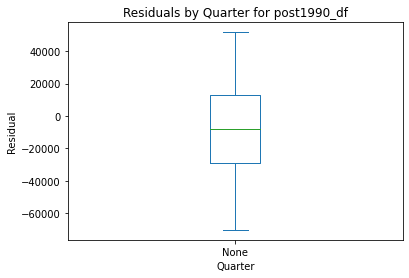

In [36]:
# Create a pre-1990 dataframe
pre1990_df = spending_df.query('Date < "1990-01-01"')

# Create a post-1990 dataframe
post1990_df = spending_df.query('Date >= "1990-01-01"')

# Group the residuals by quarter for pre1990_df
pre1990_residuals_by_quarter = residuals.groupby(pre1990_df['Quarter']).mean()

# Group the residuals by quarter for post1990_df
post1990_residuals_by_quarter = residuals.groupby(post1990_df['Quarter']).mean()

# Create a box plot of the residuals for each quarter for pre1990_df
pre1990_residuals_by_quarter.plot(kind='box')
plt.xlabel("Quarter")
plt.ylabel("Residual")
plt.title("Residuals by Quarter for pre1990_df")
plt.show()

# Create a box plot of the residuals for each quarter for post1990_df
post1990_residuals_by_quarter.plot(kind='box')
plt.xlabel("Quarter")
plt.ylabel("Residual")
plt.title("Residuals by Quarter for post1990_df")
plt.show()

In [ ]:
# You can compare the relative volatility across quarters for the two subsets, by looking at the spread of the boxes
# and the number of outliers for each subset. If the post-1990 subset has more volatility across quarters than the 
# pre-1990 subset, it suggests that consumer spending has become more seasonal after 1990.

### H) LOWESS TREND (OPTIONAL)

In [37]:
from statsmodels.nonparametric.smoothers_lowess import lowess

y = spending_df["RealPCE"]

x = range(1, len(spending_df)+1)

lowess_results = lowess(exog=x, endog=y)
print(type(lowess_results), lowess_results.shape) #> np.array with two cols, x and y_pred

lowess_y_pred = lowess_results[:, 1] # use just the second column, of preds

<class 'numpy.ndarray'> (299, 2)


In [38]:
spending_df["Lowess_Pred"] = lowess_y_pred
spending_df["Lowess_Resid"] = spending_df["RealPCE"] - spending_df["Lowess_Pred"]

Plot Predictions / Trend

Plot Residuals

Seasonality

Pre vs Post 1990

## 2) Persistence of Oil Volatility



In this exercise, we focus on movements of crude oil prices, by analyzing the monthly volatility of returns in spot West Texas Intermediate (WTI) prices. All data are originally sourced from the US Energy Information Administration (EIA).

(a) Load the dataset given in "CrudePrices_Monthly.xlsx". 

> NOTE: The `"Vol"` column provides the intra-month volatility of oil returns, while the `"LastSpot"` column indicates the last price of WTI for that month. And the `"Ret"` column is the monthly return if one was to hold on to a barrel of oil over the course of the month.

(b) What is the correlation betweeen intra-month volatility and monthly oil returns?

> HINT: use any one of the correlation methods demonstrated in the setup section


(c) Plot the autocorrelation function (ACF) of crude oil volatility. On average, how correlated is this month’s return volatility with next month’s?

(d) As oil volatility seems to be fairly persistent, we will estimate an autoregressive model to better determine the fit. Fit an autoregressive model with three lags (AR(3)) and display the output of the regression. Which volatility term (i.e. lag period) is most significant in predicting current volatilty?

(e) Use the trained ARMA model to predict volatility for the time period from `"2016-01-31"` to `"2019-12-31"`. Then plot these predictions vs the actual volatility values.


(f) One issue that commonly arises is that while a model can do a good job forecasting the data it is fitted to (in this case 1986 – 2019), it might have difficulty forecasting new data in the future (2020 and beyond). How might one test whether the model does a good job with out-of-sample (i.e. unseen) data? Answer this question in words. 

### A) LOAD AND CLEAN DATA

In [39]:
# LOAD THE DATA

file_name = "CrudePrices_Monthly.xlsx"
oil_df = pd.read_excel(f"https://github.com/s2t2/msfo-833-prep/blob/main/data/{file_name}?raw=true")
oil_df.head()

,Date,Year,Month,Vol,LastSpot,Ret
0,1986-01-31,1986,1,0.161230,18.95,NaN
1,1986-02-28,1986,2,0.240258,13.23,-0.301847
2,1986-03-31,1986,3,0.310706,10.25,-0.225246
3,1986-04-30,1986,4,0.268445,13.38,0.305366
4,1986-05-31,1986,5,0.194400,14.30,0.068759


In [40]:
print(oil_df.columns)

Index(['Date', 'Year', 'Month', 'Vol', 'LastSpot', 'Ret'], dtype='object')


### B) CORRELATION

In [41]:
correlation = oil_df['Vol'].corr(oil_df['Ret'])
print(correlation)

-0.1665886609259294


### C) ACF PLOT

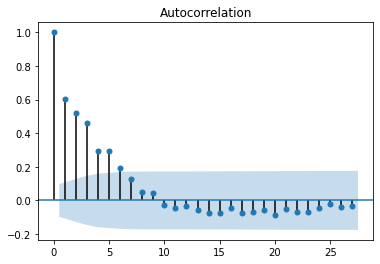

In [42]:
from statsmodels.graphics.tsaplots import plot_acf

# Extract volatility column
volatility = oil_df['Vol']

# Plot the ACF
plot_acf(volatility)
plt.show()

In [43]:
# The plot will show the autocorrelation coefficients for each lag (i.e. the correlation between the volatility at each 
# month and the volatility at different lags in time). The x-axis represents the lag, and the y-axis represents the 
# autocorrelation coefficient. The shaded region 
# represents the confidence interval, within which we would expect the true autocorrelation to lie if the model were correct.

# The average correlation between this month's return volatility and next month's can be determined by looking at the 
# autocorrelation coefficient at lag 1. A value closer to 1 means a strong positive correlation, a value closer to -1 
# means a strong negative correlation and a value close to 0 means no correlation.

### D) ARMA MODEL (LAG=3)

In [44]:
from statsmodels.tsa.ar_model import AR

# Extract volatility column
volatility = oil_df['Vol']

# Fit AR(3) model
model = AR(volatility).fit(maxlag=3)

print(model.summary())

                               AR Model Results                               
Dep. Variable:                      V  -                  o                  l
Model:                          AR(3)   Log Likelihood                 732.303
Method:                          cmle   S.D. of innovations              0.040
Date:                Fri, 20 Jan 2023   AIC                             -6.429
Time:                        20:56:25   BIC                             -6.380
Sample:                             0   HQIC                            -6.410
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0272      0.005      5.515      0.000       0.018       0.037
L1.Vol         0.3916      0.049      8.035      0.000       0.296       0.487
L2.Vol         0.1895      0.052      3.669      0.0

### E) ARMA PREDICTIONS

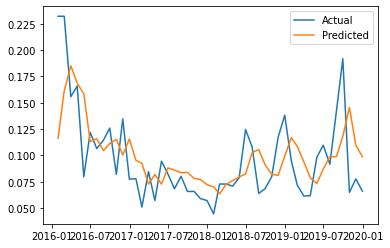

In [45]:
# Convert date column to datetime format
oil_df['Date'] = pd.to_datetime(oil_df['Date'], format='%Y-%m-%d')

# Set date column as index
oil_df.set_index('Date', inplace=True)

# Extract volatility column
volatility = oil_df['Vol']

# Fit ARMA model
model = sm.tsa.ARMA(volatility, order=(3,0)).fit()

# Define start and end dates
start = "2016-01-31"
end = "2019-12-31"

# Predict volatility for the specified time period
predictions = model.predict(start=start, end=end)

# Extract actual volatility for the specified time period
actual = oil_df.loc[start:end, 'Vol']

# Plot actual vs predicted volatility
plt.plot(actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

### F) OUT OF SAMPLE / UNSEEN

In [21]:
# One way to test whether a model does a good job with out-of-sample data is to use a technique called "walk-forward validation." 
# This method involves dividing the dataset into two parts, one for training the model (in-sample data) and one for testing the 
# model's ability to forecast new data (out-of-sample data). The model is trained on the in-sample data and then used to make 
# predictions on the out-of-sample data. This process is repeated multiple times, with the out-of-sample data being moved forward
# one time step each time, until all the data has been used for both training and testing. The model's performance is then evaluated
# based on the accuracy of its predictions on the out-of-sample data. Another technique is to use the last a certain proportion of 
# the data as holdout-set or test-set and evaluate the performance on this set, this is known as cross-validation.

Answer: 


...



